In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


In [ ]:
!nvidia-smi

Wed Dec 13 08:43:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import os
import random
import shutil

In [ ]:
# data_dir = "/content/drive/MyDrive/TB_Dataset"
# output_dir = "/content/drive/MyDrive/DATASET"
# split_data(data_dir, output_dir)

Data split completed:
Train: 3540
Validation: 1011
Test: 507

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = '/content/drive/MyDrive/DATASET'

In [ ]:
# Lung Segmentation Function using Thresholding
def lung_segmentation(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur for smoothing and noise reduction
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply binary thresholding to identify lung region
    _, lung_mask = cv2.threshold(blurred_image, 30, 255, cv2.THRESH_BINARY)

    # Convert the mask to CV_8U
    lung_mask = lung_mask.astype(np.uint8)

    # Use the lung mask to segment the original image
    segmented_image = cv2.bitwise_and(image, image, mask=lung_mask)

    return segmented_image

# Example Filtration Function using Gaussian Blur
def image_filtration(image):
    # Apply Gaussian blur for noise reduction
    filtered_image = cv2.GaussianBlur(image, (5, 5), 0)
    return filtered_image

In [ ]:
# Apply combined preprocessing in the generator
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True,
                                   preprocessing_function = lambda x: image_filtration(lung_segmentation(x)))

# Ensure that your train_generator is using the correct path
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 3540 images belonging to 2 classes.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes = np.unique(train_generator.classes), y = train_generator.classes)

In [ ]:
train_generator.class_indices

{'Normal': 0, 'Tuberculosis': 1}

In [ ]:
val_datagen = image.ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
validation_generator=val_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/validation',
                                                      target_size = (224,224),
                                                      batch_size = 28,
                                                      class_mode = 'binary')

Found 1011 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'Normal': 0, 'Tuberculosis': 1}

In [ ]:
print("Training Generator Samples:", train_generator.samples)
print("Validation Generator Samples:", validation_generator.samples)

Training Generator Samples: 3540
Validation Generator Samples: 1011


In [ ]:
train_generator

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
model = Sequential()

In [ ]:
# model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(224,224,3)))
# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid'))

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

# model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
# callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir)]


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_6 (Bat  (None, 111, 111, 32)      128       
 chNormalization)                                                
                                                                 
 dropout_27 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 54, 54, 32)       

In [ ]:
logdir='/content/drive/MyDrive/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/cp.ckpt'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)


In [ ]:
hist1 = model.fit(train_generator, epochs=100, batch_size=32, callbacks=[model_checkpoint_callback, tensorboard_callback], validation_data=validation_generator)

Epoch 1/100
111/111 [==============================] - 121s 1s/step - loss: 0.4753 - accuracy: 0.8017 - val_loss: 0.4897 - val_accuracy: 0.7725
Epoch 2/100
111/111 [==============================] - 122s 1s/step - loss: 0.3832 - accuracy: 0.8347 - val_loss: 0.5144 - val_accuracy: 0.7774
Epoch 3/100
111/111 [==============================] - 114s 1s/step - loss: 0.3541 - accuracy: 0.8418 - val_loss: 0.5375 - val_accuracy: 0.7052
Epoch 4/100
111/111 [==============================] - 113s 1s/step - loss: 0.3173 - accuracy: 0.8605 - val_loss: 0.5062 - val_accuracy: 0.7211
Epoch 5/100
111/111 [==============================] - 113s 1s/step - loss: 0.3121 - accuracy: 0.8653 - val_loss: 0.6477 - val_accuracy: 0.6924
Epoch 6/100
111/111 [==============================] - 112s 1s/step - loss: 0.2839 - accuracy: 0.8794 - val_loss: 0.4878 - val_accuracy: 0.8170
Epoch 7/100
111/111 [==============================] - 121s 1s/step - loss: 0.3012 - accuracy: 0.8715 - val_loss: 0.2767 - val_accuracy:

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.14.0


In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/drive/MyDrive/cp.ckpt'

In [ ]:
# Loads the weights
model.load_weights(latest)

In [ ]:
model.save('my_model_latest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Load the model and its weights
# model = model.load_weights(checkpoint_path)

model.save(os.path.join('/content/drive/MyDrive/Model','imageclassifier_latest.h5'))
# new_model = load_model('imageclassifier.h5')

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
new_model = load_model("/content/my_model_latest.h5")

In [ ]:
new_model.evaluate(validation_generator) # For validation data

37/37 [==============================] - 270s 7s/step - loss: 0.1862 - accuracy: 0.9466


[0.18624620139598846, 0.9465875625610352]

In [ ]:
test_datagen = image.ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
test_generator=test_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/test',
                                                      target_size = (224,224),
                                                      batch_size = 28,
                                                      class_mode = 'binary')

Found 507 images belonging to 2 classes.


In [ ]:
import cv2
import imghdr

In [ ]:
test_generator

In [ ]:
test_loss, test_acc = new_model.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

19/19 [==============================] - 28s 2s/step - loss: 0.1974 - accuracy: 0.9152
Test Loss: 0.1974, Test Accuracy: 0.9152


In [ ]:
for batch in test_generator:
    X, y = batch
    yhat = new_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 38ms/step


KeyboardInterrupt: ignored

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.80289453, shape=(), dtype=float32) tf.Tensor(0.8500036, shape=(), dtype=float32) tf.Tensor(0.9151471, shape=(), dtype=float32)


In [ ]:
import os
import cv2
import imghdr
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

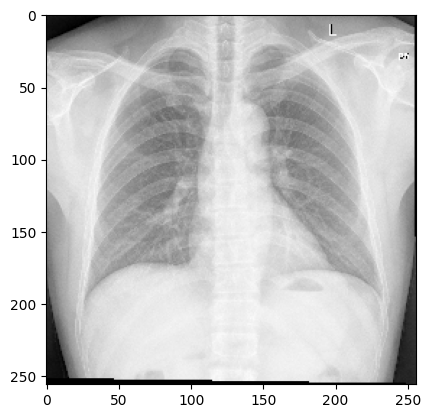

In [ ]:
img = cv2.imread('/content/NORMAL_111.png')
plt.imshow(img)
plt.show()

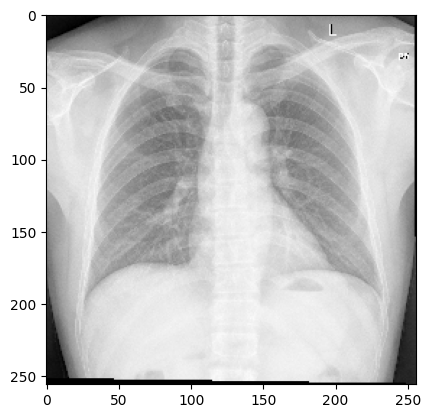

In [ ]:
imgtb = cv2.imread('/content/TUBERCULOSIS_1001.png')
plt.imshow(img)
plt.show()

In [ ]:
resized_image = cv2.resize(img, dsize=(224, 224))

In [ ]:
resized_image_tb = cv2.resize(imgtb, dsize=(224, 224))

In [ ]:
fin_img = image_filtration(lung_segmentation(resized_image))

In [ ]:
fin_imgtb = image_filtration(lung_segmentation(resized_image_tb))

In [ ]:
yhat = new_model.predict(np.expand_dims(fin_img/255, 0))

1/1 [==============================] - 2s 2s/step


In [ ]:
yhat = new_model.predict(np.expand_dims(fin_imgtb/255, 0))

1/1 [==============================] - 0s 110ms/step


In [ ]:
print(yhat)

[[0.90302956]]


In [ ]:
if yhat[0] < 0.85:
  print("Your Chances of having TB are very low.")
else:
  print(f"Your chances of having TB are HIGH about {round(yhat[0][0]*100,2)}%")

Your chances of having TB are HIGH about 90.3%
